# **Decision Trees**

Decision Trees is a machine learning algorithm which uses the Tree data structure to classify data points into classes. Here is an example of a decision Tree. The purple boxes are called nodes.

![image info](image.png)

The questions shown in the Tree are the features with respect to the tree gets further divided. To find the correct question such that we obtain as much information as possible, we use information gain.
$$ \text{Entropy of a node} = \sum_i -p_i log(p_i)$$ 
where $p_i$ is the probability of the i-th class in that node.\
Now we find the Information Gain.
$$IG = E_{parent} - \sum_i w_i E_{child}$$
where $E_{parent}$ is the entropy of the parent node and $E_{child}$ is the entropy of the child node.\
$w_i$ is the weight of that node ie if the parent has 20 elements and they get divided, and one of the child has 6 elements then the weight of that child is $\frac{6}{20}$

In [70]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn import datasets,preprocessing
import sklearn
import random


In [71]:
# Define Tree data structure
class TreeNode:
    def __init__(self,value):
        self.value = value
        self.children = []
        self.parent = None
        self.feature = None
        self.ancestor = []
        self.isleafnode = False
        self.conditiontogethere = None
        self.ent = 0
    def add_child(self,child):
        child.parent = self 
        self.children.append(child)
        
    def printtree(self):
        prefix = ' '*self.get_level*3
        print(prefix + self.value)
        if len(self.children) >0:
            for child in self.children:
                child.printtree()
    
    def get_level(self):
        level = 0
        p = self.parent
        while p:
            level += 1
            p = p.parent
        return level
    def get_ancestry(self):
        ancestry = []
        current = self
        # Loop through parent references until reaching the root
        while current is not None:
            ancestry.append(current)
            current = current.parent
        return ancestry[::-1]
    def get_ancestry_features(self):
        ancestry_features = []
        current = self
        # Loop through parent references until reaching the root
        while current is not None:
            ancestry_features.append(current.feature)
            current = current.parent
        return ancestry_features[::-1]
    def printtree_features(self):
        prefix = ' ' * self.get_level()*3
        print(prefix + f'{self.feature}')
        if len(self.children) >0:
            for child in self.children:
                child.printtree_features()
    
    def printtree_datalen(self):
        prefix = ' ' * self.get_level()*3
        lenth = len(self.value)
        print(prefix + f"{lenth}")
        if len(self.children) >0:
            for child in self.children:
                child.printtree_datalen()
    

In [72]:
# Import data as a pandas dataframe
df = pd.read_csv(r"D:/ML/house_votes_84.csv")


In [73]:

# Define the splitting function
def DT(df,node):
     # Check if the lode is a leaf node
    if node.isleafnode == False: 
        # Initiate necessary lists
        yayindex = []
        nayindex = []
        novoteindex = []
        ig_list = []
        # get the ancestor features of a node so as to not repeat a question
        ancestors_features = node.get_ancestry_features()
        
        # Get the entropy of the node
        rootent = node.ent
        
        # Iterate over all columns (data and names)
        for col_name,col_data in df.items():
            
            # Check if the current column is our target column and if the current column has already been used in ancestor features
            if col_name != "target" and  col_name not in ancestors_features :
                
                # Initialize counters to keep track of the classes being divided into the three nodes
                yaycounter = np.zeros(2)
                naycounter = np.zeros(2)
                novotecounter = np.zeros(2)

                # Iterate over the column index
                for ind in col_data.index:
                    value = col_data[ind]
                    
                    # Check the value of a row for current column and increment the counters according to the class of the row
                    if value == 0:
                        
                        if df["target"][ind] == 0:
                            yaycounter[0] += 1
                            
                        else: yaycounter[1] += 1

                        
                    if value== 1:
                    
                        if df["target"][ind] == 0:
                            naycounter[0] += 1
                            
                        else: naycounter[1] += 1

                    if value == 2:
                    
                        if df["target"][ind] == 0:
                            novotecounter[0] += 1
                            
                        else: novotecounter[1] += 1

                #  Calculate the total number of  elements in all child nodes
                yaycounter_sum = np.sum(yaycounter)
                naycounter_sum = np.sum(naycounter)
                novotecounter_sum = np.sum(novotecounter)

                # Calculate the probabilities of a row being of a certain class in the child nodes
                if yaycounter_sum !=0:
                    p0d = yaycounter[0]/np.sum(yaycounter)
                    p0r = yaycounter[1]/np.sum(yaycounter)
                else: p0d,p0r = 0,0 

                if naycounter_sum != 0:
                    p1d = naycounter[0]/np.sum(naycounter)
                    p1r = naycounter[1]/np.sum(naycounter)
                else: p1d,p1r = 0,0

                if novotecounter_sum != 0:
                    p2d = novotecounter[0]/np.sum(novotecounter)
                    p2r = novotecounter[1]/np.sum(novotecounter) 
                else: p2d,p2r = 0,0
                
                # Manage the probabilities so as to not get calculation errors
                p0d = np.where(p0d > 0, p0d, 1e-10)
                p0r = np.where(p0r > 0, p0r, 1e-10)
                p1d = np.where(p1d > 0, p1d, 1e-10)
                p1r = np.where(p1r > 0, p1r, 1e-10)
                p2d = np.where(p2d > 0, p2d, 1e-10)
                p2r = np.where(p2r > 0, p2r, 1e-10)

                # Calculate the entropy of the children
                ent0 = -(p0d*np.emath.logn(2,p0d) + p0r*np.emath.logn(2,p0r))
                ent1  = -(p1d*np.emath.logn(2,p1d) + p1r*np.emath.logn(2,p1r))
                ent2 = -(p2d*np.emath.logn(2,p2d) + p2r*np.emath.logn(2,p2r))
                
                # Calculate the information gain
                if (yaycounter_sum + naycounter_sum+ novotecounter_sum) != 0:
                    ig = rootent - ((yaycounter_sum*ent0 + naycounter_sum*ent1 + novotecounter_sum*ent2)/(yaycounter_sum + naycounter_sum+ novotecounter_sum))
                else: ig = 0

                # Append the information gain for splitting by each column
                ig_list.append(ig)

        # Get the index of the column with maximum information gain
        f = ig_list.index(max(ig_list))
        

        # Get the indices of the rows that get splitted into yay, nay and novote
        for i in range(len(df[df.columns[f]])):

            if df[df.columns[f]][i] == 0:
                yayindex.append(i)
                

            if df[df.columns[f]][i] == 1:
                nayindex.append(i)
                

            if df[df.columns[f]][i] == 2:
                novoteindex.append(i)
        
        # Add the rows to appropriate data frames according to how they were split
        yaydf = df.iloc[yayindex]
        yaydf = yaydf.reset_index(drop=True)

        naydf = df.iloc[nayindex]
        naydf = naydf.reset_index(drop=True)

        novotedf = df.iloc[novoteindex]
        novotedf = novotedf.reset_index(drop=True)
        
        # Assign the feature of this node to be feature with maximum information gain
        node.feature = df.columns[f]

        # Intitiallize 3 nodes which are the child nodes of the split and set their values and entropies
        # as well as the condition to get there
        yaynode = TreeNode(yaydf)
        yaynode.conditiontogethere = 0
        yaynode.ent = ent0
        naynode = TreeNode(naydf)
        naynode.conditiontogethere = 1
        naynode.ent = ent1
        novotenoode = TreeNode(novotedf)
        novotenoode.conditiontogethere = 2
        novotenoode.ent = ent2

        # Add the nodes as the child nodes of the one being split
        node.add_child(yaynode)
        node.add_child(naynode)
        node.add_child(novotenoode)
        
        # Return the nodes
        return yaynode,naynode,novotenoode 
#print(ig_list)
#print(df.columns[f])

### For splitting the tree we choose a stopping conditions, There are several stopping conditions\
### The one that is used here is the maximum depth stopping condition, i.e. after a certain depth of the tree the splitting stops

In [74]:

def StartDT(usedroot,maxi:int):
    # intitate a list with the root node
    current_level_nodes = [usedroot]               
    i = 0

    # Run until we reach the desired depth                                                                                            
    while(i<maxi):
    
        
        next_level_nodes = []

        # Run over all elements in the current_level list
        for elements in current_level_nodes:
            
            # Split the current node and add the childrent to the next level node list
            yaynode,naynode,novotenoode = DT(elements.value,elements)
            next_level_nodes.extend([yaynode, naynode, novotenoode])
             

        
        current_level_nodes = next_level_nodes

     



    
        i = i +1
                               

In [75]:
# Define a testing function
def Test(testdata,root1):
    # Initiate an answer list
    answer = []
    
    # Iterate over all of the rows in the testing data
    for i in range(len(testdata)):

        # Assign the node and testing row
        node = root1
        test = testdata.iloc[i]

        # Traverse over the tree
        while(node.children):
            # Iterate over all condition to get heres
            for j in range(3):
                
                # Avoid edge case errors
                if node.feature != None:
                    # Check if the row matches the condition to get here value
                    if test[node.feature] == node.children[j].conditiontogethere:
                        node = node.children[j]
                        break

                
            if node.feature == None: break            
                
        # chekc the majority class and assign it as the answer
        value_counts = node.value["target"].value_counts()
        if len(list(value_counts)) !=1:
            
            count_0 = value_counts.get(0, 0)
            count_1 = value_counts.get(1, 0)

            if count_0 > count_1:
                answer.append(0)
            elif count_1> count_0:
                answer.append(1)
            elif count_0 == count_1:
                answer.append(random.randint(0,1))
        else: 
            value_counts = list(value_counts)
            answer.append(node.value["target"][0])
    
    # Return the answer list
    return answer
        
        
        
        

Now we split the dataframe into testing and training data and test the testing data. we do this 100 times to finally get a histogram.

In [76]:
# Intialize a list to hold the efficiencies
alleffstest = []

# Iterate 100 times
for i in range(100):

    # Split the data into training and testing sets and also shuffle it
    df_train,df_test = sklearn.model_selection.train_test_split(df,shuffle= True)

    # Reset the indices
    df_train = df_train.reset_index(drop= True)
    df_test = df_test.reset_index(drop= True)

    # Initialize the tree node with the training data as the value
    root = TreeNode(df_train)
    
    # get the entropy of the root node
    value = df_train['target'].value_counts()
    probd = value[0]/(value[0]+value[1])
    probl = value[1]/(value[0]+value[1])
    rootent = -(probd*np.emath.logn(2,probd) + probl*np.emath.logn(2,probl))
    root.ent = rootent
    
    # start the splitting with the depth of 4
    StartDT(root,4)

    # Test the data
    answer = Test(df_test,root)

    # calculate efficiencies
    right = 0
    for i in range(len(answer)):
        if answer[i] == df_test["target"][i]:
            right +=1

    efficiency = right/len(df_test)
    alleffstest.append(efficiency)
    # Print efficiencies
    print(efficiency)
    



0.9357798165137615
0.963302752293578
0.9174311926605505
0.9174311926605505
0.9541284403669725
0.9357798165137615
0.9174311926605505
0.8990825688073395
0.9541284403669725
0.926605504587156
0.926605504587156
0.9541284403669725
0.944954128440367
0.9357798165137615
0.9174311926605505
0.9541284403669725
0.9724770642201835
0.9724770642201835
0.9357798165137615
0.9541284403669725
0.9541284403669725
0.9357798165137615
0.926605504587156
0.9541284403669725
0.926605504587156
0.9724770642201835
0.926605504587156
0.944954128440367
0.944954128440367
0.9357798165137615
0.9541284403669725
0.9541284403669725
0.944954128440367
0.9174311926605505
0.9541284403669725
0.944954128440367
0.981651376146789
0.908256880733945
0.9357798165137615
0.926605504587156
0.9357798165137615
0.9541284403669725
0.926605504587156
0.926605504587156
0.9541284403669725
0.944954128440367
0.963302752293578
0.9541284403669725
0.963302752293578
0.9541284403669725
0.944954128440367
0.9541284403669725
0.926605504587156
0.954128440366

Now we do the same again but this time we test the training data to see if our model is overfitting or not

In [77]:
alleffstrain = []
for i in range(100):
    df_train,df_test = sklearn.model_selection.train_test_split(df,shuffle= True)
    df_train = df_train.reset_index(drop= True)
    df_test = df_test.reset_index(drop= True)
    root = TreeNode(df_train)

    value = df_train['target'].value_counts()
    probd = value[0]/(value[0]+value[1])
    probl = value[1]/(value[0]+value[1])
    rootent = -(probd*np.emath.logn(2,probd) + probl*np.emath.logn(2,probl))
    root.ent = rootent
    
    StartDT(root,4)
    answer = Test(df_train,root)
    right = 0
    for i in range(len(answer)):
        if answer[i] == df_train["target"][i]:
            right +=1

    efficiency = right/len(df_train)
    alleffstrain.append(efficiency)
    print(efficiency)
    

0.9539877300613497
0.9570552147239264
0.9693251533742331
0.9693251533742331
0.9570552147239264
0.9723926380368099
0.9693251533742331
0.9662576687116564
0.9570552147239264
0.9570552147239264
0.9631901840490797
0.9662576687116564
0.9601226993865031
0.9601226993865031
0.9601226993865031
0.9693251533742331
0.9662576687116564
0.9631901840490797
0.9601226993865031
0.9570552147239264
0.9815950920245399
0.9601226993865031
0.9631901840490797
0.9693251533742331
0.9570552147239264
0.9693251533742331
0.9631901840490797
0.9539877300613497
0.9631901840490797
0.9631901840490797
0.9570552147239264
0.9539877300613497
0.9693251533742331
0.9570552147239264
0.9570552147239264
0.9754601226993865
0.9601226993865031
0.9601226993865031
0.9631901840490797
0.9662576687116564
0.9601226993865031
0.9631901840490797
0.9662576687116564
0.9723926380368099
0.9754601226993865
0.9631901840490797
0.9754601226993865
0.9662576687116564
0.9723926380368099
0.9601226993865031
0.9631901840490797
0.9601226993865031
0.9631901840

## Show a histogram of our training data efficiencies

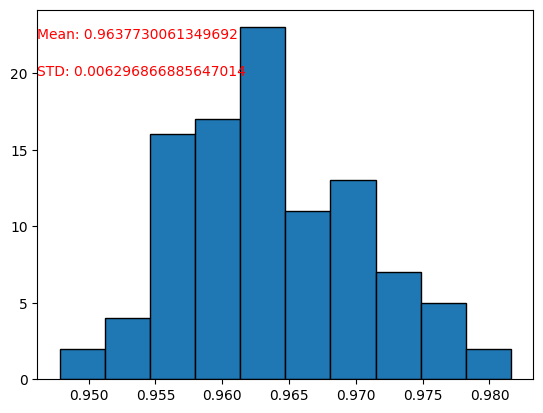

In [78]:


# calculate the meand and standard deviation of our training efficiencies
trainstd = np.std(alleffstrain)
trainmean = np.mean(alleffstrain)

# Make the histogram
plt.hist(alleffstrain,edgecolor = 'black')

# Add text on the histogram showing the mean and standard deviation
plt.text(x=0.00, y=0.85,  
         s=f"STD: {trainstd}", 
         transform=plt.gca().transAxes,  
         fontsize=10, 
         color='red',
         verticalalignment='top', 
         horizontalalignment='left')
plt.text(x=0.00, y= 0.95,  
         s= f"Mean: {trainmean}", 
         transform=plt.gca().transAxes,  
         fontsize=10, 
         color='red',
         verticalalignment='top', 
         horizontalalignment='left')

# Show the histogram
plt.show()

## Show a histogram of our testing data efficiencies

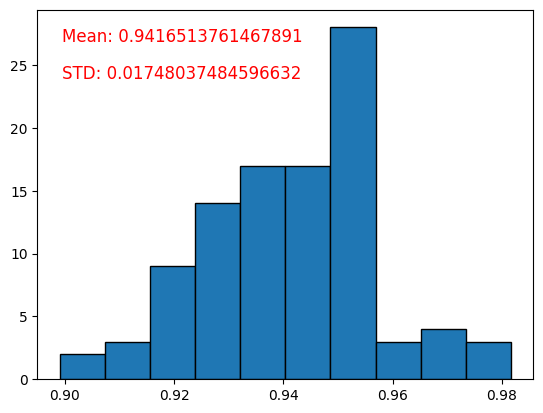

In [ ]:
teststd = np.std(alleffstest)
testmean = np.mean(alleffstest)
plt.hist(alleffstest,edgecolor = 'black')
plt.text(x=0.05, y=0.85,  
         s=f"STD: {teststd}", 
         transform=plt.gca().transAxes,  
         fontsize=12, 
         color='red',
         verticalalignment='top', 
         horizontalalignment='left')
plt.text(x=0.05, y= 0.95,  
         s= f"Mean: {testmean}", 
         transform=plt.gca().transAxes,  
         fontsize=12, 
         color='red',
         verticalalignment='top', 
         horizontalalignment='left')

plt.show()

### With this we can see that our model is over fitting as it performs better on training data than on testing data